In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

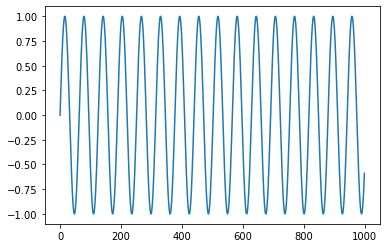

In [3]:
# Make the orginal data
N = 1000
series = np.sin(0.1*np.arange(N)) # + np.random.randn(N)*0.1

# Plot it
plt.plot(series)
plt.show()

In [4]:
# Build the dataset
# Let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range (len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10) Y.shape (990, 1)


In [5]:
# Try autoregressive linear model
model = nn.Linear(T, 1)

In [6]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [7]:
# Make inputs and targets
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[:-N//2:].astype(np.float32))
y_test = torch.from_numpy(X[:-N//2:].astype(np.float32))

In [8]:
# Training
def full_gd(map,
            criterion,
            optimizer,
            X_train,
            y_train,
            X_test,
            y_test,
            epochs=200):
  
  # Stuff to store
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()

    # Test loss
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if (it + 1) % 5 == 0:
      print(f'Epoch {it+1}/{epochs}, Train Loss {loss.item():.4f}')
  
  return train_losses, test_losses

In [9]:
train_losses, test_losses = full_gd(model,
                                    criterion,
                                    optimizer,
                                    X_train,
                                    y_train,
                                    X_test,
                                    y_test)

Epoch 5/200, Train Loss 0.4449
Epoch 10/200, Train Loss 0.1778
Epoch 15/200, Train Loss 0.0193
Epoch 20/200, Train Loss 0.0177
Epoch 25/200, Train Loss 0.0449
Epoch 30/200, Train Loss 0.0260
Epoch 35/200, Train Loss 0.0062
Epoch 40/200, Train Loss 0.0001
Epoch 45/200, Train Loss 0.0025
Epoch 50/200, Train Loss 0.0032
Epoch 55/200, Train Loss 0.0021
Epoch 60/200, Train Loss 0.0012
Epoch 65/200, Train Loss 0.0007
Epoch 70/200, Train Loss 0.0004
Epoch 75/200, Train Loss 0.0002
Epoch 80/200, Train Loss 0.0001
Epoch 85/200, Train Loss 0.0001
Epoch 90/200, Train Loss 0.0000
Epoch 95/200, Train Loss 0.0000
Epoch 100/200, Train Loss 0.0000
Epoch 105/200, Train Loss 0.0000
Epoch 110/200, Train Loss 0.0000
Epoch 115/200, Train Loss 0.0000
Epoch 120/200, Train Loss 0.0000
Epoch 125/200, Train Loss 0.0000
Epoch 130/200, Train Loss 0.0000
Epoch 135/200, Train Loss 0.0000
Epoch 140/200, Train Loss 0.0000
Epoch 145/200, Train Loss 0.0000
Epoch 150/200, Train Loss 0.0000
Epoch 155/200, Train Loss 0.00

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([495, 10])) that is different to the input size (torch.Size([495, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


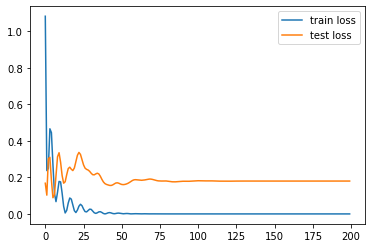

In [10]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [11]:
# "Wrong" forecasat using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# Index of first validation input
i = 0

while len(validation_predictions) < len(validation_target):
  input_ = X_test[i].view(1, -1)
  p = model(input_)[0, 0].item() # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

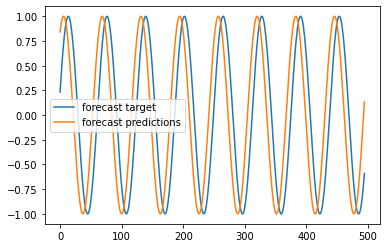

In [12]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()